In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [37]:
data_dir = Path("Data")
braemar_dir = Path(data_dir, "Braemar.txt")
heathrow_dir = Path(data_dir, "Heathrow.txt")

In [38]:
with open(braemar_dir) as f:
    braemar = f.readlines()

In [39]:
header = braemar[0].strip()
braemar = braemar[2:]

In [40]:
def clean_text(input_text:str) -> list[str]:
    split_text = input_text.split(" ")
    newlines_removed = [x.replace("\n", "").replace("Provisional", "") for x in split_text]
    return [x for x in newlines_removed if len(x) > 0]

In [41]:
header = clean_text(header)
braemar_clean = [clean_text(x) for x in braemar]
braemar_df = pd.DataFrame(braemar_clean, columns = header)

In [42]:
braemar_df = braemar_df.replace("---", np.nan)

In [43]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   yyyy    770 non-null    object
 1   mm      770 non-null    object
 2   tmax    766 non-null    object
 3   tmin    766 non-null    object
 4   af      766 non-null    object
 5   rain    743 non-null    object
 6   sun     552 non-null    object
dtypes: object(7)
memory usage: 42.2+ KB


In [45]:
braemar_df['tmin'] = braemar_df['tmin'].str.replace("*","", regex=False)
braemar_df['tmax'] = braemar_df['tmax'].str.replace("*","", regex=False)
braemar_df['af'] = braemar_df['af'].str.replace("*","", regex=False)
braemar_df['rain'] = braemar_df['rain'].str.replace("*","", regex=False)
braemar_df['sun'] = braemar_df['sun'].str.replace("*","", regex=False)

In [46]:
braemar_df = braemar_df.astype({"yyyy":int, "mm":int, "tmin":float, "tmax":float, 
                                "af":float, "rain":float, "sun":float})

In [47]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    int64  
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 42.2 KB


In [48]:
braemar_df['mm'] = braemar_df['mm'].map(
    {1: "Jan", 
     2:"Feb", 
     3:"Mar",
     4:"Apr",
     5:"May",
     6:"June",
     7:"July",
     8:"Aug",
     9:"Sep",
     10:"Oct",
     11:"Nov",
     12:"Dec"})

In [68]:
braemar_df.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
765,2022,Oct,12.4,6.4,2.0,103.8,NaN
766,2022,Nov,9.2,2.7,7.0,171.8,NaN
767,2022,Dec,3.1,-3.1,22.0,64.0,NaN
768,2023,Jan,5.1,-1.3,17.0,77.2,NaN
769,2023,Feb,7.6,1.3,7.0,43.2,NaN


/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_16264/1459334317.py:2: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_16264/1459334317.py:18: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,


Text(0.5, 1.0, 'Braemar Min and Max Temperature from 1959 - 2023')

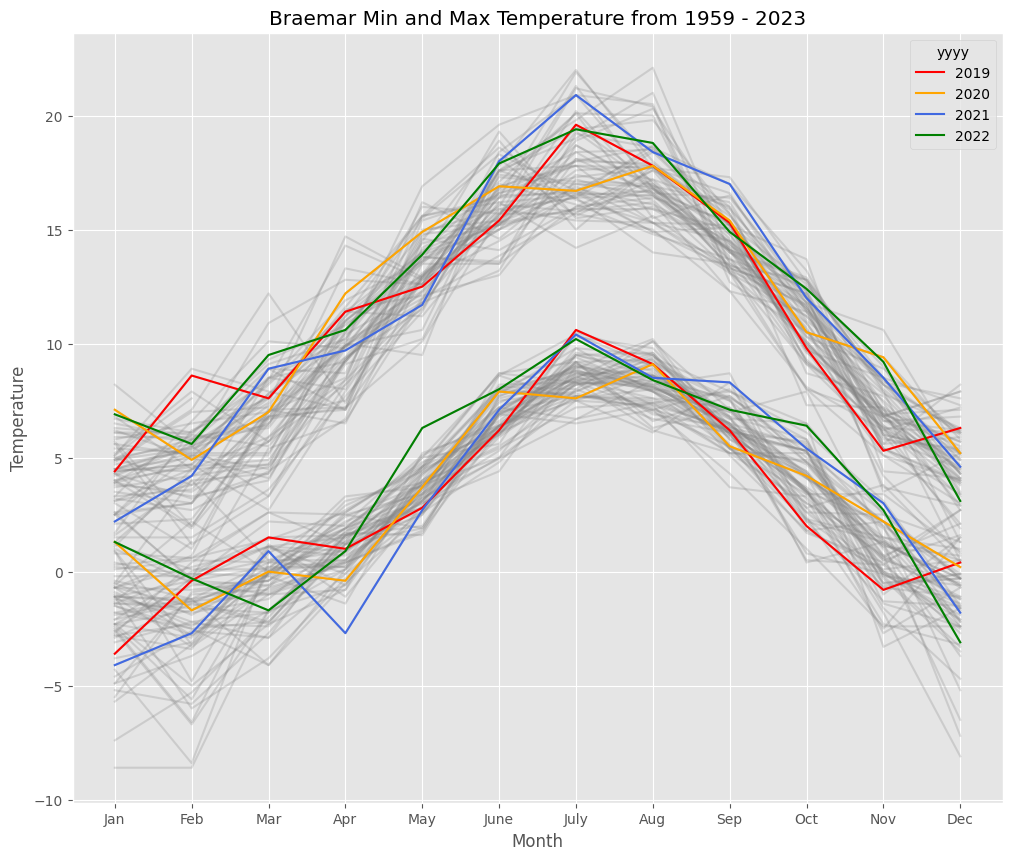

In [83]:
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['red', 'orange', 'royalblue', 'green'],
             ax = ax)

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= ['red', 'orange', 'royalblue', 'green'],
             ax = ax)

ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
ax.set_title("Braemar Min and Max Temperature from 1959 - 2023")

In [84]:
braemar_df.head(1)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1959,Jan,1.7,-5.7,27.0,NaN,34.2


In [99]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    object 
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 42.2+ KB


/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_16264/892695422.py:6: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_16264/892695422.py:24: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_16264/892695422.py:43: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,


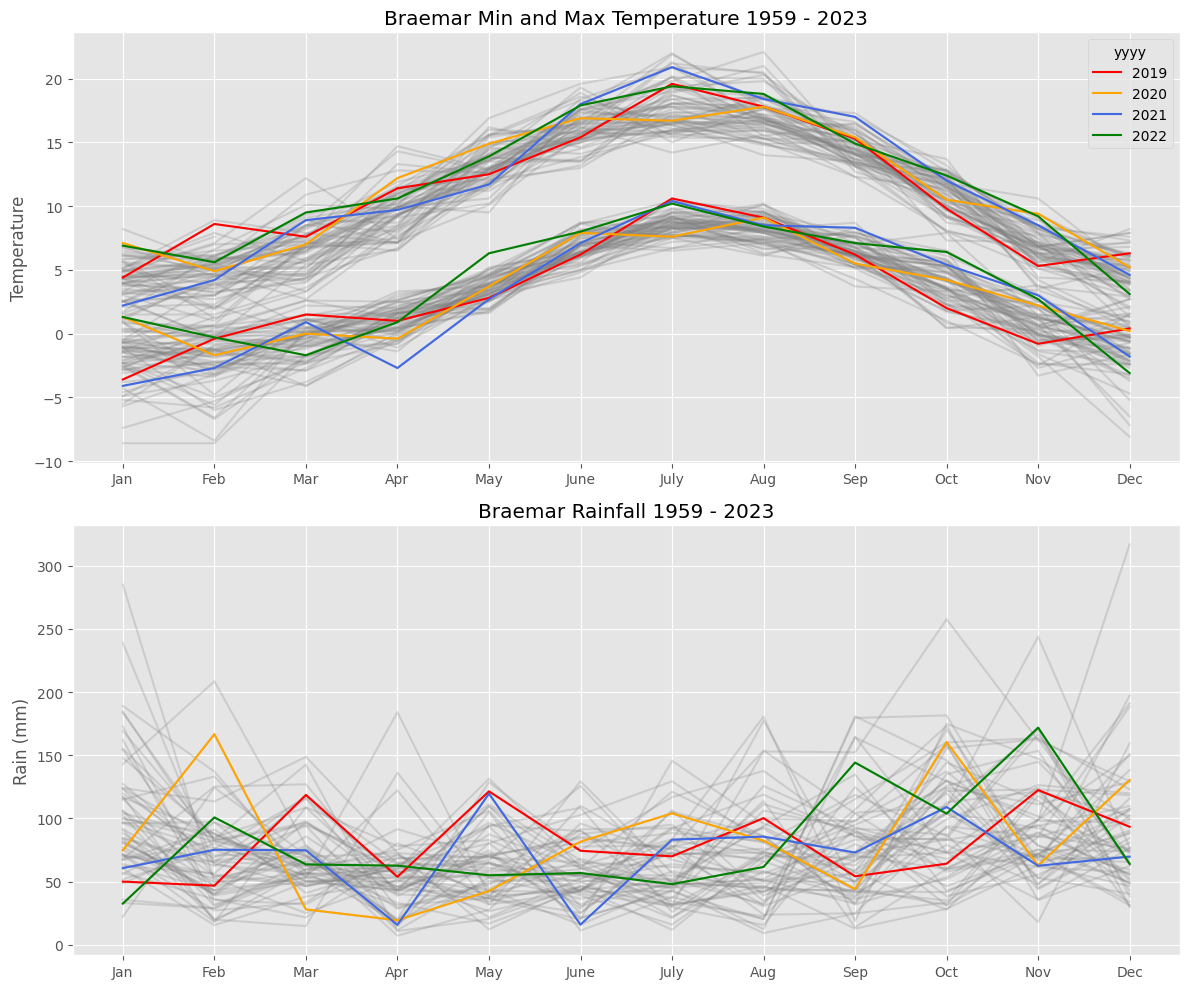

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize=(12, 10))

years = [2022,2021,2020,2019]
colours = ['red', 'orange', 'royalblue', 'green']
# tmax
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= colours,
             ax = ax1)

#tmin

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= colours,
             ax = ax1)

#Rain

sns.lineplot(data = braemar_df, 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax2)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= colours,
             ax = ax2)



ax1.set_ylabel("Temperature")
ax1.set_xlabel("")
ax1.set_title("Braemar Min and Max Temperature 1959 - 2023")


ax2.set_ylabel("Rain (mm)")
ax2.set_xlabel("")
ax2.set_title("Braemar Rainfall 1959 - 2023")

plt.tight_layout()

In [ ]:
# TODO 
# continous colour range for years
# circular barplot for temp